# 第4章 Matplotlibでグラフを描画しよう

##### Matplotlibとは・・・２次元のデータを可視化するためのサードパーティパッケージ。
##### 動作するOSを選ばないこと、繊細な描画設定ができること、出力形式が多様なことから定番の可視化ツール。

## グラフ描画の基礎

In [4]:
import matplotlib.pyplot as plt

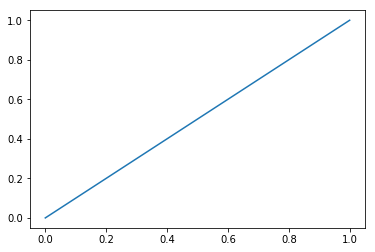

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)

dat = [0,1]
ax.plot(dat)

plt.show()

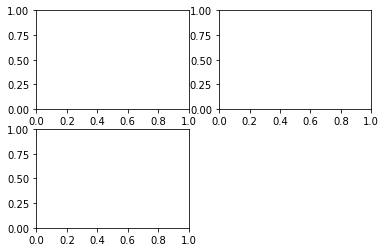

In [6]:
#フィギュアの生成
fig = plt.figure()

#フィギュア内にサブプロットを３つ配置する
ax1 = fig.add_subplot(221)#２行2列の１番
ax2 = fig.add_subplot(222)#２行２列の２番
ax3 = fig.add_subplot(223)#２行2列の３番

plt.show()

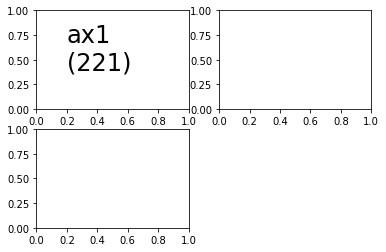

In [7]:
fig = plt.figure()
#サブプロットの作成
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

#番号記述
for i, ax in enumerate([ax1,ax2,ax3], start=1):
    txt = "ax{0}\n(22{0})".format(i)
    ax.text(0.2,0.4,txt,fontsize=24)
    plt.show()

In [8]:
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

/Users/django/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


<class 'numpy.ndarray'> [[<matplotlib.axes._subplots.AxesSubplot object at 0x12098bcc0>


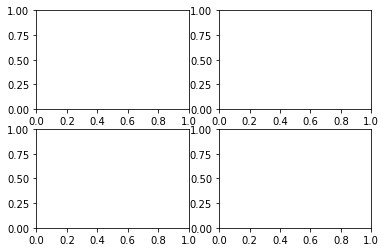

In [9]:
#フィギュアオブジェクトの作成とサブプロットの配置を同時に行う
fig, axes = plt.subplots(2,2)
print(type(axes),axes)
plt.show()

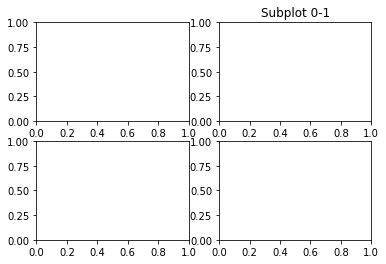

In [10]:
#１行2列目のサブプロットにサブプロットタイトルを指定
fig,axes = plt.subplots(2,2)
axes[0,1].set_title("Subplot 0-1")
plt.show()

In [11]:
plt.style.use("ggplot")

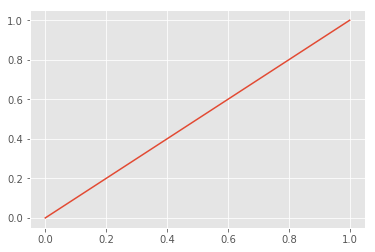

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
dat = [0,1]
ax.plot(dat)
plt.show()

## 折れ線グラフ 

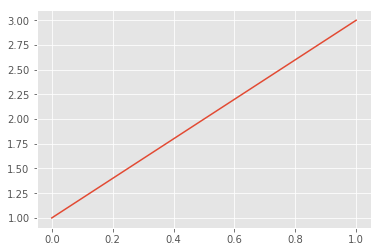

In [13]:
#折れ線グラフは、Axes.plot()メソッドを使用する。
#plotメソッドの引数が１つの場合、引数はY値になる。Xは自動的に最小値=0、最大値=リストの要素数−1の整数列が指定される
import matplotlib.pyplot as plt
plt.style.use("ggplot")
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1,3])
plt.show()

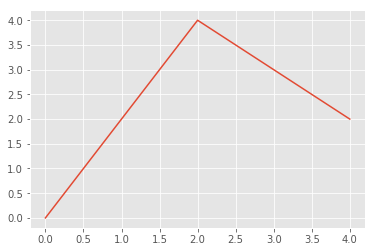

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = [0,2,4]
y = [0,4,2]
ax.plot(x,y)
plt.show()

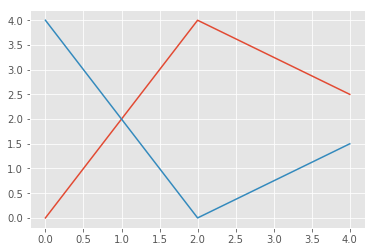

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = [0,2,4]
y1 = [0,4,2.5]
y2 = [4,0,1.5]
#２本の線を描画
ax.plot(x,y1)
ax.plot(x,y2)
plt.show()

In [16]:
import os
import pandas as pd
base_url = "https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/"
anime_stock_returns_csv = os.path.join(base_url, "anime_stock_returns.csv")
df = pd.read_csv(anime_stock_returns_csv, index_col=0, parse_dates=["Date"])
df.head()

,TOEI ANIMATION,IG Port
Date,,
2015-01-01,1.000000,1.000000
2015-01-02,1.000000,1.000000
2015-01-05,1.011695,1.014082
2015-01-06,1.001463,1.000000
2015-01-07,0.982457,1.000824


/Users/django/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


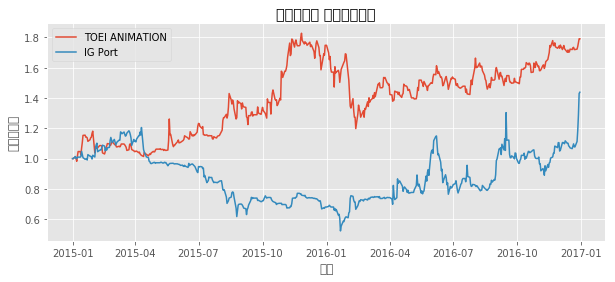

In [17]:
#株価の上下を折れ線グラフで。時系列の情報を含むデータには折れ線が適している。
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
#データの凡例を指定
ax.plot(df.index, df["TOEI ANIMATION"], label = "TOEI ANIMATION")
ax.plot(df.index, df["IG Port"], label ="IG Port")
#タイトル、軸ラベルを指定
ax.set_title('株価騰落率 二年間の推移')
ax.set_ylabel("株価騰落率")
ax.set_xlabel("年月")
#判例を有効化
ax.legend()
plt.show()

## 帰ったらやることー38p参照し、日本語の適用をする 

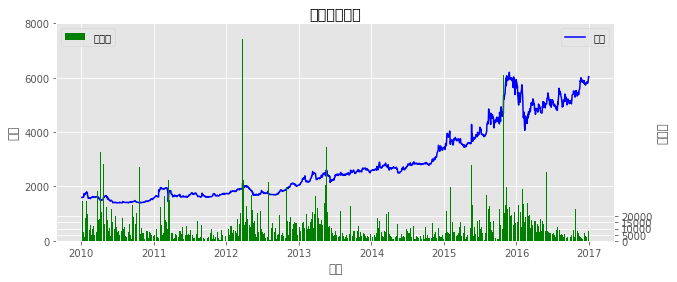

In [18]:
t4816_csv = os.path.join(base_url, "4816.csv")
df = pd.read_csv(t4816_csv, index_col=0, parse_dates=["Date"])
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(111)
ax1.plot(df.index, df["Close"], color ="b", label="株価")
#X軸を共有しY軸を２つ使用する設定
ax2 = ax1.twinx()
ax2.bar(df.index, df["Volume"], color="g", label="出来高",width=2)
#軸と軸ラベルの設定
ax1.set_yticks([ i * 2000 for i in range(5)])
ax1.set_ylabel("株価")
ax2.set_yticks([ i * 5000 for i in range(5)])
ax2.set_ylabel("出来高")
ax1.set_xlabel("年月")
#グラフタイトルの設定
ax1.set_title("株価と出来高")
#凡例の設定
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()

## 散布図

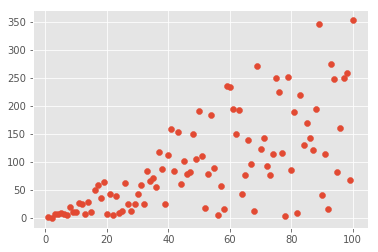

In [19]:
#散布図は、Axes.scatter()メソッドを使う。
#nunpy.random.seed()メソッドは、乱数のseedを固定することにより、常に同じ乱数を発生させることができる。
#下記も、同じ図を再現でき右葉に当該メソッドを実行している。
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")
#入力値の生成
np.random.seed(2)
x = np.arange(1,101)
y = 4 * x * np.random.rand(100)
#散布図の描画
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(x,y)
plt.show()

In [20]:
import os
import pandas as pd
base_url = "https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/"
anime_master_csv = os.path.join(base_url, "anime_master.csv")
df = pd.read_csv(anime_master_csv)
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [21]:
df = pd.read_csv(anime_master_csv, index_col="anime_id")
df.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


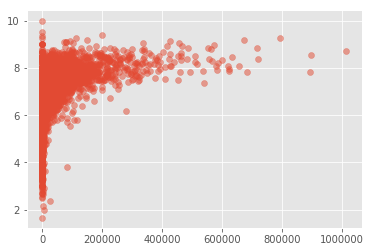

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df["members"],df["rating"],alpha=0.5)
plt.show()
#メンバ数の増加（評価者の増加）にともない、レーティングは８付近に集中していく

In [23]:
#membersの値でデータを絞り込み
df.loc[df["members"] >= 800000, ["name","members"]]

,name,members
anime_id,,
1535,Death Note,1013917
16498,Shingeki no Kyojin,896229
11757,Sword Art Online,893100


In [24]:
#membersと、ratingの値でデータを絞り込み
df.loc[(df["members"] >= 600000) & (df["rating"] >= 8.5), ["name","rating"]]

,name,rating
anime_id,,
5114,Fullmetal Alchemist: Brotherhood,9.26
9253,Steins;Gate,9.17
1575,Code Geass: Hangyaku no Lelouch,8.83
1535,Death Note,8.71
16498,Shingeki no Kyojin,8.54


In [25]:
types = df["type"].unique()
types

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'], dtype=object)

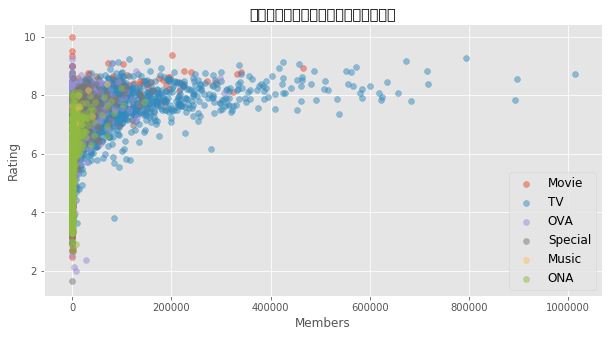

In [26]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
for t in types:
    x = df.loc[df["type"] == t, "members"]
    y = df.loc[df["type"] == t, "rating"]
    ax.scatter(x,y,alpha=0.5, label=t)
    
ax.set_title("配給種別ごとにグループ化した散布図")
ax.set_xlabel("Members")
ax.set_ylabel("Rating")
ax.legend(loc="lower right", fontsize=12)
plt.show()

## 棒グラフ 

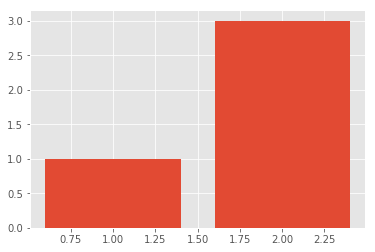

In [27]:
#Axes.bar()メソッドを使う。
import matplotlib.pyplot as plt
plt.style.use("ggplot")
fig = plt.figure()
ax = fig.add_subplot(111)
x = [1,2]
y = [1,3]
ax.bar(x,y)
plt.show()

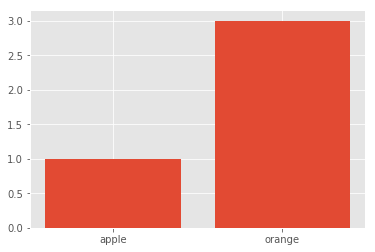

In [28]:
#横軸のメモリにラベルを設定
fig = plt.figure()
ax = fig.add_subplot(111)
labels = ["apple", "orange"]
ax.bar(x, y, tick_label=labels)
plt.show()

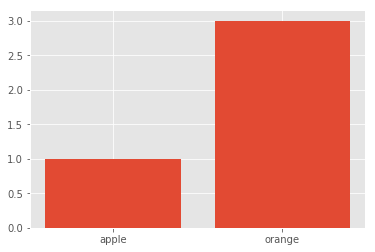

In [29]:
#描画した後に目盛りラベルを設定する
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(x,y)
#X軸の軸メモリと軸目盛りラベル
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.show()

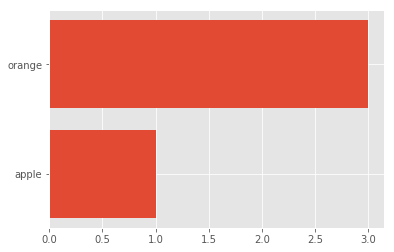

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.barh(x, y, tick_label=labels) #barにrhをつけると、横向きグラフになる
plt.show()

In [31]:
import os
import pandas as pd
base_url = "https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/"
anime_master_csv = os.path.join(base_url,"anime_master.csv")
dfac = pd.read_csv(anime_master_csv)
dfac.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


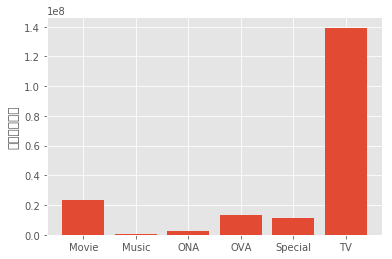

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
y = dfac.groupby('type').sum()["members"]
x = range(len(y))
xlabels = y.index
ax.bar(x, y, tick_label=xlabels)
ax.set_ylabel("合計メンバ数")
plt.show()

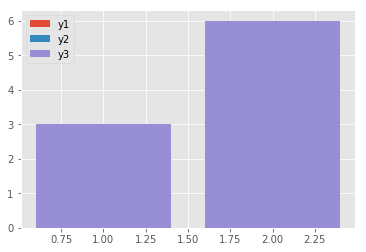

In [33]:
import numpy as np
#データセットの作成
x = [1,2]
y1,y2,y3 = [1,2], [2,4], [3,6]
#複数グループの棒グラフの描画
fig = plt.figure()
ax = fig.add_subplot(111)
w = 0.2
ax.bar(x, y1, label = "y1")
ax.bar(x, y2, label = "y2")
ax.bar(x, y3, label = "y3")
ax.legend()
plt.show()

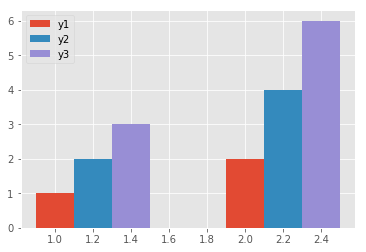

In [34]:
# 複数グループの棒グラフの描画
fig = plt.figure()
ax = fig.add_subplot(111)
w = 0.2
ax.bar(x, y1, width=w, label="y1")
ax.bar(np.array(x) + w, y2, width=w, label="y2")
ax.bar(np.array(x) + w * 2, y3,width=w, label="y3")
ax.legend()
plt.show()

In [35]:
base_url = "http://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/"
anime_genre_top10_pivoted_csv = os.path.join(base_url, "anime_genre_top10_pivoted.csv")
dfag = pd.read_csv(anime_genre_top10_pivoted_csv, index_col="genre")
dfag

,Movie,Music,ONA,OVA,Special,TV
genre,,,,,,
Comedy,7293127.0,20860.0,1477266.0,5614758.0,6659293.0,65420862.0
Action,10224960.0,77054.0,524907.0,5793680.0,3412689.0,63364032.0
Drama,9034099.0,100734.0,188427.0,3043374.0,1915578.0,41011557.0
Romance,5245386.0,42811.0,411331.0,3143167.0,2015820.0,40703388.0
Supernatural,5452779.0,9189.0,192989.0,2696715.0,2336723.0,38956520.0
Fantasy,8019406.0,43962.0,188937.0,2754224.0,2504131.0,34932563.0
Shounen,5698808.0,NaN,97833.0,3861296.0,2591988.0,35532847.0
School,1512533.0,5496.0,523223.0,2417660.0,2661425.0,35489099.0
Adventure,9485223.0,42829.0,70431.0,2373765.0,2052024.0,27529975.0


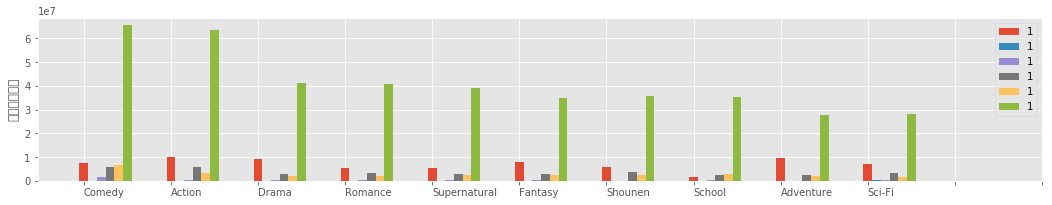

In [36]:
fig = plt.figure(figsize=(18,3))
ax = fig.add_subplot(111)
wt = np.array(range(len(dfag)))
w = 0.1
for i in dfag.columns:
    ax.bar(wt, dfag[i], width=w, label=1)
    wt = wt + w
ax.set_xticks(np.array(range(len(dfag) + 2)))
ax.set_xticklabels(dfag.index, ha="left")
ax.set_ylabel("のべメンバ数")
ax.legend()
plt.show()

AttributeError: Unknown property lable

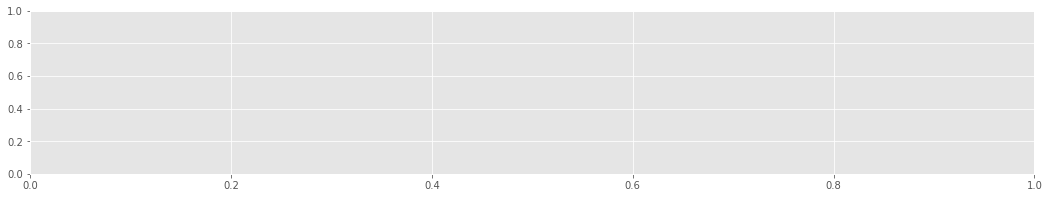

In [37]:
#スコアの開きが大きいと、視認性が低くなるので、対数軸にかきかえする
fig = plt.figure(figsize=(18,3))
ax = fig.add_subplot(111)
wt = np.array(range(len(dfag)))
w = 0.1
for i in dfag.columns:
    ax.bar(wt, dfag[ i ], width=w, lable=i)
    wt = wt + w
ax.set_xticks(np.array(range(len(dfag) + 2)))
ax.set_xticklabels(dfag.index, ha="left")
ax.set_ylabel("のべメンバ数")
ax.set_yscale("log")
ax.legend()
plt.show()

In [ ]:
#データセットの作成
x = np.arange(5)
np.random.seed(0)
y = np.random.rand(15).reshape((3,5))
y1,y2,y3 = y
y1b = np.array(y1)
y2b = y1b + np.array(y2)
y3b = y2b + np.array(y3)
#積み上げ棒グラフの描画
fig = plt.figure(figsize=(10,3))
ax = fig.add_subplot(111)
ax.bar(x, y3b, label="y3")
ax.bar(x, y2b, label="y2")
ax.bar(x, y1b, label="y1")
ax.legend()
plt.show()

In [ ]:
figure = plt.figure(figsize=(10,3))
ax = figure.add_subplot(111)
ax.bar(x, y3, bottom=y2b, label="y3")
ax.bar(x, y2, bottom=y1, label="y2")
ax.bar(x, y1, label="y")
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(111)
rows, cols = len(dfag), len(dfag.columns)
x = range(rows)
for i, t in enumerate(dfag.columns):
    #i列目から、最終列までの和を計算
    y = dfag.iloc[ : , i:cols].sum(axis=1)
    ax.bar(x,y,label=t)
ax.set_xticks(range(rows + 2))
ax.set_xticklabels(dfag.index)
ax.set_ylabel("のべメンバ数")
ax.legend()
plt.show()


In [ ]:
#bottomオプションを使用して積み上げる。
figure = plt.figure(figsize=(10,3))
ax = figure.add_subplot(111)
ax.bar(x, y3, bottom=y2b, label="y3")
ax.bar(x, y2, bottom=y1, label="y2")
ax.bar(x, y1, label="y1")
ax.legend()
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(111)
rows, cols = len(dfag), len(dfag.columns)
x = range(rows)

for i , t in enumerate(dfag .columns):
    #i列目から、最終列までの和を計算
    y = dfag.iloc[:, i:cols].sum(axis=1)
    ax.bar(x,y,label=t)
ax.set_xticks(range(rows + 2))
ax.set_xticklabels(dfag.index)
ax.set_ylabel("のべメンバ数")
ax.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
#データセットの作成
mu = 100 #平均値
sigma = 10 #標準偏差
np.random.seed(0)
x = np.random.normal(mu, sigma, 10000)
#ヒストグラムの描画
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(x)
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(x, rwidth=0.9, bins=16)
plt.show()

In [ ]:
import os 
import pandas as pd
base_url = "http://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/"
anime_master_csv = os.path.join(base_url, "anime_master.csv")
df = pd.read_csv(anime_master_csv, index_col="anime_id")
df.head()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df["rating"],range=(0,10), rwidth=0.9)
ax.set_title("Rating")
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df_tv = df[df["type"] == "TV"]
ax.hist(df_tv["episodes"],rwidth=0.9)
ax.set_title("Episodes")
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
#rangeの値を(0,100)に指定します。
ax.hist(df_tv["episodes"], rwidth=0.9, range=(0,100))
ax.set_title("Episodes(0-100)")
plt.show()

In [ ]:
#横向きのヒストグラム
np.random.seed(0)
x = np.random.normal(100,10,10000)
fig = plt.figure()
ax = fig.add_subplot(111)
#orientationを、horizontalに指定
ax.hist(x, rwidth=0.9, bins=16, orientation="horizontal")
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df["rating"], normed=True, rwidth=0.9)
plt.show()

In [ ]:
#累積ヒストグラム
fig = plt.figure()
ax = fig.add_subplot(111)
#cumulativeをTrueに指定
ax.hist(df["rating"], normed=True, cumulative=True, rwidth=0.9)
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df["rating"], bins=[2,4,5.5,6.5,7,7.5,8.5,10],
        rwidth=0.9)
plt.show()

In [ ]:
bins = 50
dfmin = np.min(df["rating"])
dfmax = np.max(df["rating"])
# ヒストグラムの描画
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(df["rating"], bins=bins, range=(dfmin, dfmax), normed=True,
        rwidth=0.9)
# 平均と標準偏差
mu, sigma = df["rating"].mean(), df["rating"].std()
# X値
x = np.linspace(dfmin, dfmax, bins)
#近似的な確率密度関数を使用してYを生成？？？
y = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))
ax.plot(x,y)
plt.show()

In [ ]:
types = df["type"].unique()
labels = types.tolist()
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
b_num = np.arange(0,10.5,0.5)
for t in types:
    ax.hist(df.loc[df["type"] == t, "rating"],
            bins = b_num,
            rwidth = 0.9,
            alpha = 0.5,
            label = t)
ax.legend()
ax.set_xlabel("rating")
ax.set_ylabel("Count(rating)")
plt.show()

In [ ]:
dataset = [df.loc[df["type"] == t, "rating"] for t in types]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.hist(dataset,
         bins = np.arange(0,10.5,0.5),
        rwidth = 0.9,
        alpha = 0.8,
        label = labels)
ax.legend()
ax.set_xlabel("rating")
ax.set_ylabel("Count(rating)")
plt.show()

In [ ]:
#複数グループを積み上げて描画
# dataset, labelsは「並べて描画」で作成したものを使用
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.hist(dataset,
        bins=np.arange(0, 10.5, 0.5),
        rwidth=0.9,
        alpha=0.7,
        label=labels,
        stacked=True)
ax.legend()
ax.set_xlabel("rating")
ax.set_ylabel("Count(rating)")
plt.show()

In [ ]:
# 箱ひげ図
import matplotlib.pyplot as plt
plt.style.use("ggplot")
x = [1,2,3,3,11,20]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(x)
plt.show()

In [ ]:
#複数のリストをリストにセット
x = [[1,2,3,3,11,20],[1,2,9,10,15,16]]
labels = ["A", "B"]
fig = plt.figure()
ax = fig.add_subplot(111)
#データとラベルを指定
ax.boxplot(x, labels=labels)
plt.show()

In [ ]:
import os
import pandas as pd
df = pd.read_csv(anime_master_csv, index_col="anime_id")
df.head(3)

In [ ]:
labels = [ ]
types_list = [ ]
for label, df_per_type in df.groupby("type"):
    labels.append(label)
    types_list.append(df_per_type["episodes"].tolist())
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(types_list, labels=labels)
plt.show()

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.boxplot(types_list, labels=labels)
ax.set_ylim(0, 100)
plt.show()

In [ ]:
#データの作成
import numpy as np
np.random.seed(3)
dataset = [np.random.normal(20 + mu, 5, 1000)
           for mu in range(1,5)]

In [ ]:
#グラフの書式設定を、CSSみたいに行うことができるみたい。
#外れ値の書式辞書
flierprop = {"color" : "#EC407A",
             "marker": "o",
             "markerfacecolor":"#2196F3",
             "markeredgecolor":"white",
             "markersize":5,
             "linestyle":"None",
             "linewidth":0.1}
#箱の書式辞書
boxprop = {"color":"#2196F3",
           "facecolor":"#BBDEFB",
           "linewidth":1,
           "linestyle":"-"}
#ヒゲの書式辞書
whiskerprop = {"color":"#2196F3",
               "linewidth":1,
               "linestyle":"--"}
#ひげまったんきゃっぷ
capprop = {"color":"#2196F3",
           "linewidth":1,
           "linestyle" :  ":"}
medianprop = {"color":"#2196F3",
              "linewidth":2,
              "linestyle":"-"}
meanprop = {"color":"2196F3",
            "marker":"^",
            "markerfacecolor":"#2196F3",
            "markeredgecolor":"white",
            "markersize":10,
            "linewidth":1,
            "linestyle":""}


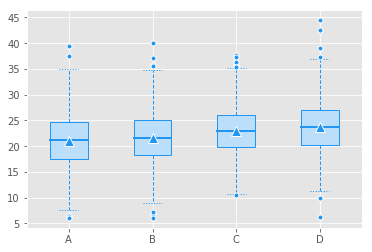

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(
    dataset,
    patch_artist="Patch", #書式を設定する場合はpatchを選択する
labels=["A","B","C","D"],
showmeans=True,
flierprops=flierprop,
    boxprops=boxprop,
    whiskerprops=whiskerprop,
    capprops=capprop,
    medianprops=medianprop,
    meanprops=meanprop
)
plt.show()

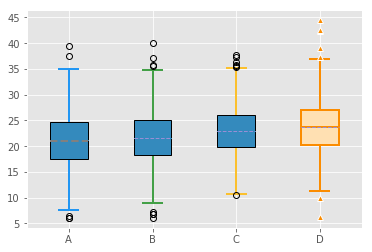

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)
bp = ax.boxplot(dataset, patch_artist="Patch", labels=["A","B","C","D"],
                meanline=True, showmeans=True)
# color set
colors1=["#2196F3", "#43A047", "#FBC02D", "#FB8C00"]
colors2=["#BBDEFB", "#C8E6C9", "#FFF9C4", "#FFE0B2"]
# 上下に分かれた設定にするための数列
n = [0,0,1,1,2,2,3,3]
#書式設定　　箱と外れ値、中央値の書式設定
for params in zip(bp["boxes"],
                      bp["fliers"],
                      bp["medians"],
                      colors1,
                      colors2):
    bpb, bpf, med, color1, color2 = params
    #ここのインデントし忘れでしばらくエラーだった
#箱の書式設定
bpb.set_color(color1)
bpb.set_facecolor(color2)
bpb.set_linewidth(2)
#外れ値の書式設定
bpf.set(marker="^",color=color2)
bpf.set_markeredgecolor("white")
bpf.set_markerfacecolor(color1)
#中央値の書式設定
med.set_color(color1)
med.set_linewidth(2)
#ヒゲとヒゲの末端キャップの書式設定
for bpc, bpw, m in zip(bp["caps"], bp["whiskers"], n):
         bpc.set_color(colors1[m])
         bpc.set_linewidth(2)
         bpw.set_color(colors1[m])
         bpw.set_linewidth(2)
#平均値の書式設定
for mean, color2 in zip(bp["means"], colors2):
         mean.set_color("gray")
         mean.set_linewidth(2)
         mean.set_linestyle("--")
         plt.show()
         #abcがうまくいってない。時間があったらp188をもう一度見直す。

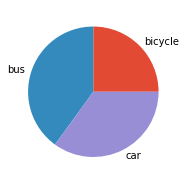

In [48]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
labels = ["bicycle", "bus", "car"]
sizes = [25,40,35]#何パーセントか
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111)
#円グラフの描画
ax.pie(sizes, labels=labels)
plt.show()

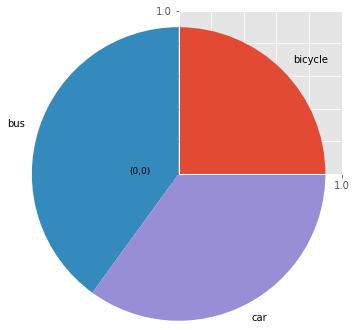

In [53]:
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111)
ax.pie(sizes, labels=labels, radius=0.9, frame=True)
ax.text(-0.3, 0, "(0,0)", fontsize=9)
plt.show()

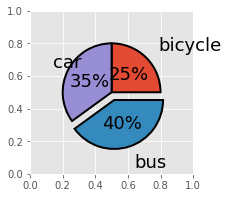

In [54]:
#円グラフの書式設定
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111)
#扇型の書式設定用辞書
wprops = {"edgecolor":"black",
          "linewidth":2}
#テキストの書式設定用辞書
tprops = {"fontsize":18}
ax.pie(sizes,
       explode=(0.,0.05,0),
       labels=labels,
       autopct="%1.0f%%",
       pctdistance=0.5,
       shadow=False,
       labeldistance=1.35,
       startangle=90,
       radius=0.3,
       counterclock=False,
       wedgeprops=wprops,
       textprops=tprops,
       center=(0.5,0.5),
       frame=True)
plt.show()

In [57]:
#円グラフの活用
df = pd.read_csv(anime_genre_top10_pivoted_csv, index_col="genre")
df

,Movie,Music,ONA,OVA,Special,TV
genre,,,,,,
Comedy,7293127.0,20860.0,1477266.0,5614758.0,6659293.0,65420862.0
Action,10224960.0,77054.0,524907.0,5793680.0,3412689.0,63364032.0
Drama,9034099.0,100734.0,188427.0,3043374.0,1915578.0,41011557.0
Romance,5245386.0,42811.0,411331.0,3143167.0,2015820.0,40703388.0
Supernatural,5452779.0,9189.0,192989.0,2696715.0,2336723.0,38956520.0
Fantasy,8019406.0,43962.0,188937.0,2754224.0,2504131.0,34932563.0
Shounen,5698808.0,NaN,97833.0,3861296.0,2591988.0,35532847.0
School,1512533.0,5496.0,523223.0,2417660.0,2661425.0,35489099.0
Adventure,9485223.0,42829.0,70431.0,2373765.0,2052024.0,27529975.0


In [58]:
# TV
df_tv = df.sort_values(by="TV",ascending=False)["TV"]
# Movie
df_movie = df.sort_values(by="Movie", ascending=False)["Movie"]
df_tv

genre
Comedy          65420862.0
Action          63364032.0
Drama           41011557.0
Romance         40703388.0
Supernatural    38956520.0
Shounen         35532847.0
School          35489099.0
Fantasy         34932563.0
Sci-Fi          28072322.0
Adventure       27529975.0
Name: TV, dtype: float64

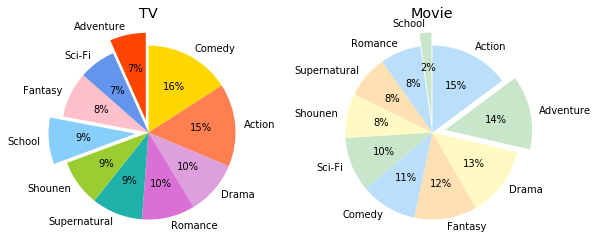

In [64]:
fig = plt.figure(figsize=(9,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
#カラーセット
colors1=("gold","coral","plum","orchid","lightseagreen",
         "yellowgreen","lightskyblue","pink","cornflowerblue",
         "orangered")
color2 = ("coral","oranged","plum","pink","gold",
          "cornflowerblue","yellowgreen","lightseagreen","orchid",
          "lightskyblue")
ax1.pie(df_tv,
        explode=(0, 0, 0, 0, 0, 0, 0.15, 0, 0, 0.15),
        labels=df_tv.index,
        autopct="%1.0f%%",
        colors=colors1,
        startangle=90, counterclock=False)

ax2.pie(df_movie,
        explode=(0, 0.15, 0, 0, 0, 0, 0, 0, 0, 0.15),
        labels=df_movie.index,
        autopct="%1.0f%%",
        colors=colors2,
        startangle=90, counterclock=False)

ax1.set_title("TV")
ax2.set_title("Movie")
fig.subplots_adjust(wspace=0.3)
plt.show()